# Etapa 4: Gráficos de Módulo e Fase (Pré-processamento)

**Objetivo:** Visualizar o conteúdo espectral do sinal original escolhido (Onda Quadrada).

**Tarefas:**
* Criar o gráfico de módulo do sinal (eixo x: frequência/harmônica, eixo y: magnitude).
* Criar o gráfico de fase do sinal (eixo x: frequência/harmônica, eixo y: fase em radianos ou graus).
* Interpretar os gráficos: quais componentes dominam? Há simetria? Qual o papel da fase na reconstrução do sinal?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, fft

## Sinal Original (Onda Quadrada) e Parâmetros

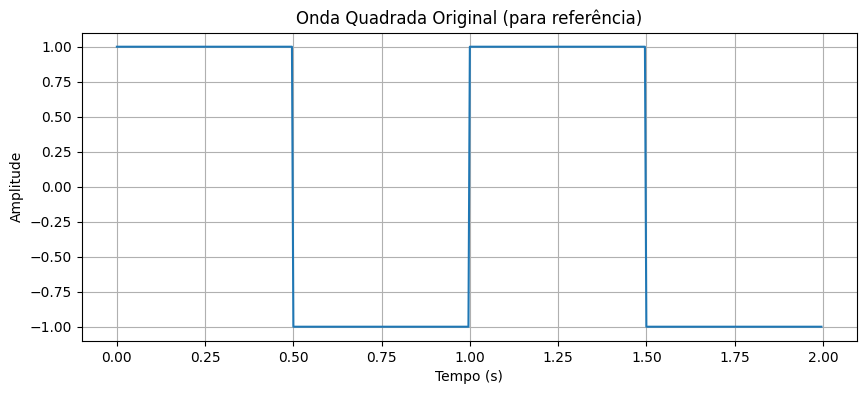

In [2]:
# Parâmetros do sinal (consistente com Etapas Anteriores)
f_fundamental = 1  # Hz
T = 1 / f_fundamental # Período
amplitude = 1
n_ciclos_plot = 2 # Número de ciclos para plotagem no tempo
N_pontos_fft = 1024 # Número de pontos para a FFT (deve ser suficiente para boa resolução espectral)

# Para a FFT, é melhor ter um número maior de ciclos para capturar bem a periodicidade
# e um número de pontos que seja potência de 2 para eficiência da FFT, se possível.
# Vamos usar uma duração que cubra vários ciclos para a análise FFT.
duracao_fft = 10 * T # 10 ciclos para a FFT
t_fft = np.linspace(0, duracao_fft, N_pontos_fft, endpoint=False)

# Onda Quadrada para FFT
onda_quadrada_fft = amplitude * signal.square(2 * np.pi * f_fundamental * t_fft)

# Onda Quadrada para plotagem no tempo (igual à etapa 2)
t_plot = np.linspace(0, n_ciclos_plot * T, 500, endpoint=False)
onda_quadrada_plot = amplitude * signal.square(2 * np.pi * f_fundamental * t_plot)

plt.figure(figsize=(10, 4))
plt.plot(t_plot, onda_quadrada_plot)
plt.title('Onda Quadrada Original (para referência)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

## Cálculo da FFT e Espectro

In [3]:
# Calcular a FFT
# A FFT é complexa, então Y_onda_quadrada terá partes reais e imaginárias
Y_onda_quadrada = fft.fft(onda_quadrada_fft)

# Calcular o vetor de frequências correspondente
# fftfreq gera as frequências na ordem usada pela fft (positivas e depois negativas)
freqs = fft.fftfreq(N_pontos_fft, d=duracao_fft/N_pontos_fft) # d é o intervalo de amostragem no tempo

# Como o sinal de entrada é real, o espectro é simétrico.
# Vamos pegar apenas a parte positiva das frequências (e a componente DC, se houver).
# Para isso, pegamos a primeira metade dos pontos da FFT e das frequências.
N_metade = N_pontos_fft // 2
Y_metade = Y_onda_quadrada[:N_metade]
freqs_metade = freqs[:N_metade]

# Calcular o Módulo (Magnitude)
modulo = np.abs(Y_metade) * (2 / N_pontos_fft) 
modulo[0] = np.abs(Y_metade[0]) / N_pontos_fft # Correção para a componente DC (f=0)

# Calcular a Fase
fase = np.angle(Y_metade)

# Limpar a fase para componentes com módulo muito pequeno
threshold_modulo = 1e-3 # Se o módulo for menor que isso, a fase não é confiável
fase[modulo < threshold_modulo] = 0

## Gráficos de Módulo e Fase

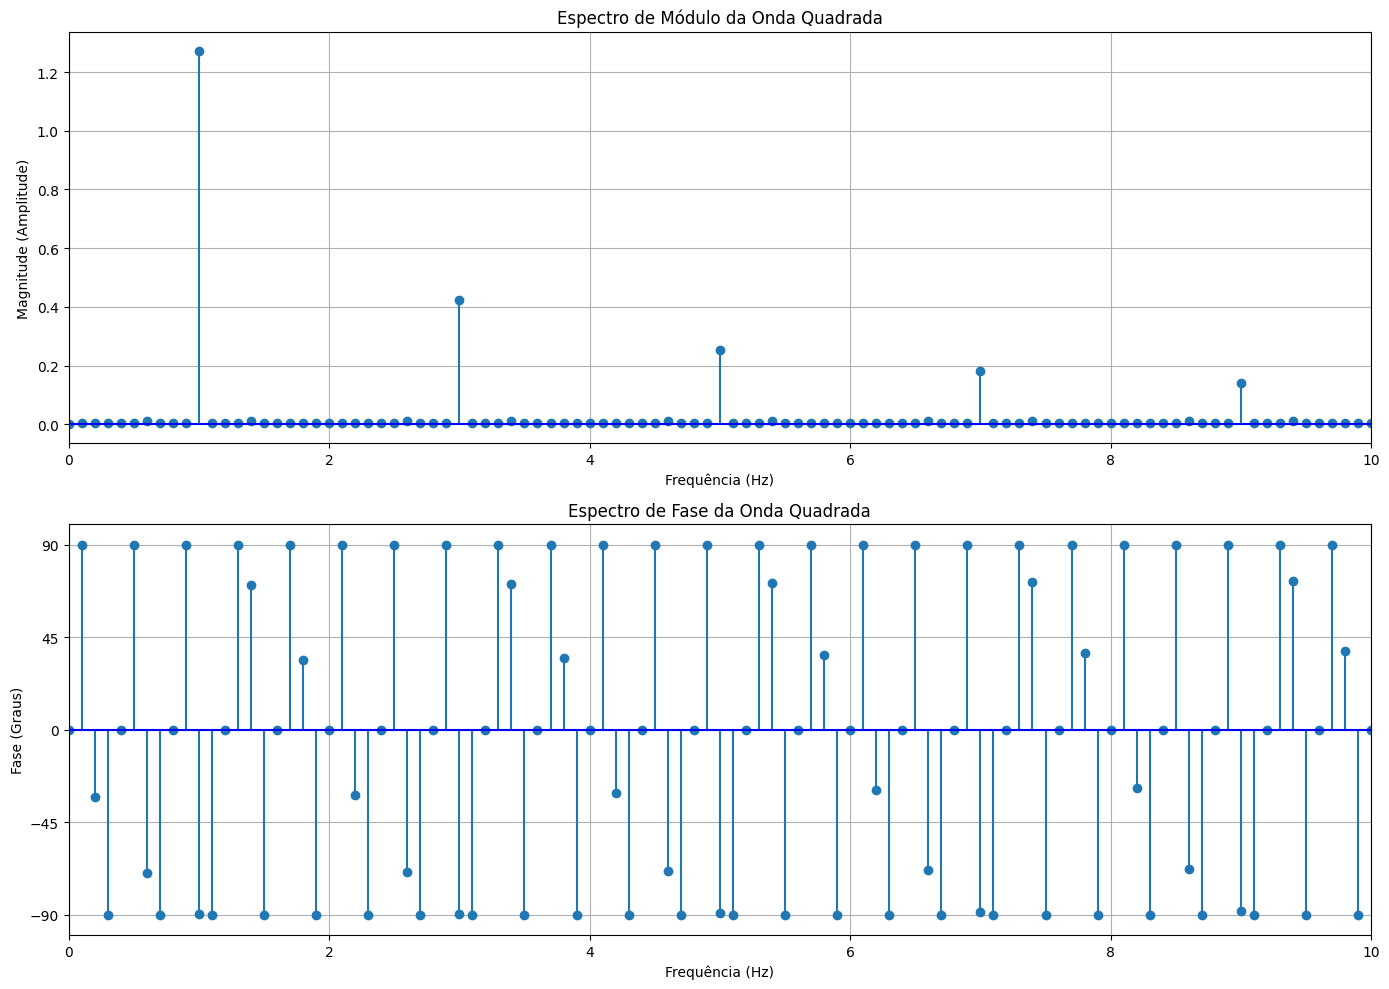

In [4]:
plt.figure(figsize=(14, 10))

# Gráfico de Módulo
plt.subplot(2, 1, 1)
plt.stem(freqs_metade, modulo, basefmt="b-")
plt.title('Espectro de Módulo da Onda Quadrada')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude (Amplitude)')
plt.xlim(0, 10 * f_fundamental) # Mostrar até algumas harmônicas
plt.grid(True)

# Gráfico de Fase
plt.subplot(2, 1, 2)
plt.stem(freqs_metade, np.rad2deg(fase), basefmt="b-") # Fase em graus
plt.title('Espectro de Fase da Onda Quadrada')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Fase (Graus)')
plt.xlim(0, 10 * f_fundamental) # Mostrar até algumas harmônicas
plt.ylim(-100, 100) # Limitar o eixo Y para melhor visualização
plt.yticks([-90, -45, 0, 45, 90])
plt.grid(True)

plt.tight_layout()
plt.show()

## Interpretação dos Gráficos

### Análise do Espectro de Módulo:
1. **Componentes Dominantes:**
   * O gráfico de módulo mostra picos de magnitude nas frequências que são múltiplos ímpares da frequência fundamental ($f_0 = 1$ Hz).
   * Não há componente em DC (0 Hz) significativa, pois a onda quadrada gerada tem valor médio zero.
   * A amplitude das harmônicas decai com o aumento da frequência, proporcional a $1/k$.

2. **Simetria:**
   * O espectro de módulo exibido (apenas frequências positivas) não mostra simetria em si, mas o espectro completo da FFT é conjugado simétrico.

### Análise do Espectro de Fase:
1. **Valores de Fase:**
   * Para a onda quadrada, as componentes de frequência apresentam uma fase de aproximadamente -90 graus ou +90 graus.
   * Pequenas variações podem ser devidas a efeitos numéricos da FFT.

2. **Papel da Fase na Reconstrução do Sinal:**
   * A fase é crucial para a reconstrução correta da forma de onda no domínio do tempo.
   * Alterações nas fases podem mudar drasticamente a forma do sinal reconstruído.